In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer

# Setup
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load processed Dashen reviews
df = pd.read_csv('../data/processed/dashen_clean_reviews.csv')
df['date'] = pd.to_datetime(df['date'])  # ensure datetime
df.head()


[nltk_data] Downloading package stopwords to C:\Users\Alem The
[nltk_data]     Kal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviewId,userName,review,rating,thumbsUpCount,app_version,date,bank,clean_review,sentiment
0,6ab16d21-d2c8-4235-9c48-ff713bfde731,Adonijah,I like this mobile banking app very much. Over...,2,0,1.0.16,2025-06-07 10:40:29,Dashen Bank,i like this mobile banking app very much overa...,0.333333
1,22818807-3368-446c-8a3b-d3ca2e07a2d8,OBSA KA,love,3,0,1.0.16,2025-06-06 00:15:44,Dashen Bank,love,0.500000
2,765ff69f-5274-45c5-985b-81b8d01e1874,Koki Mulugeta,wow,5,0,NaN,2025-06-03 17:30:11,Dashen Bank,wow,0.100000
3,7db66b6a-a044-43f1-a7ad-ea8a10815548,Badhasa Dassaalany,gadaa,5,0,1.0.16,2025-06-01 17:10:53,Dashen Bank,gadaa,0.000000
4,caf4a80c-85db-4b49-ab9c-a0b55e152317,Nebiyu Getachew Mamo,Massive upgrade from the Amole app.,5,0,1.0.16,2025-05-31 23:04:04,Dashen Bank,massive upgrade from the amole app,0.000000


Total reviews: 588
Date range: 2025-04-21 to 2025-06-07
Average rating: 4.65


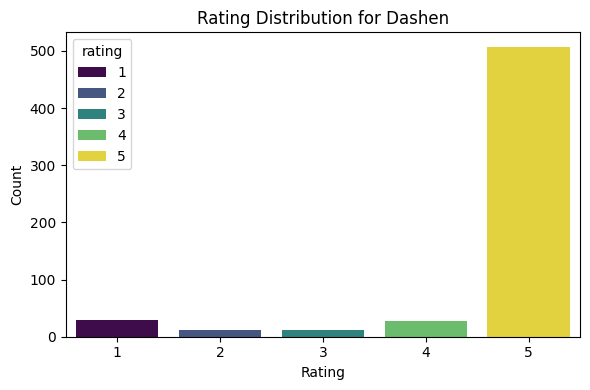

In [2]:
print("Total reviews:", len(df))
print("Date range:", df['date'].min().date(), "to", df['date'].max().date())
print("Average rating:", round(df['rating'].mean(), 2))

# Rating distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='rating', palette='viridis', hue='rating')
plt.title('Rating Distribution for Dashen')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [5]:
def get_top_ngrams(texts, n=10, ngram_range=(2, 2)):
    """Compute top n-grams from text series."""
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english', max_features=200)
    X = vectorizer.fit_transform(texts.dropna())
    feature_names = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1
    ngrams = sorted(zip(feature_names, counts), key=lambda x: x[1], reverse=True)[:n]
    return ngrams
top_trigrams = get_top_ngrams(df['review'], n=10, ngram_range=(3, 3))

print('\nTop 10 N-grams for Dashen Bank:')
for term, count in top_trigrams:
    print(f'{term}: {count}')


Top 10 N-grams for Dashen Bank:
dashen super app: 33
dashen bank super: 21
bank super app: 18
mobile banking app: 15
super easy use: 12
app easy use: 9
best digital platforms: 9
digital platforms ve: 9
experience highly recommended: 9
game changer app: 9


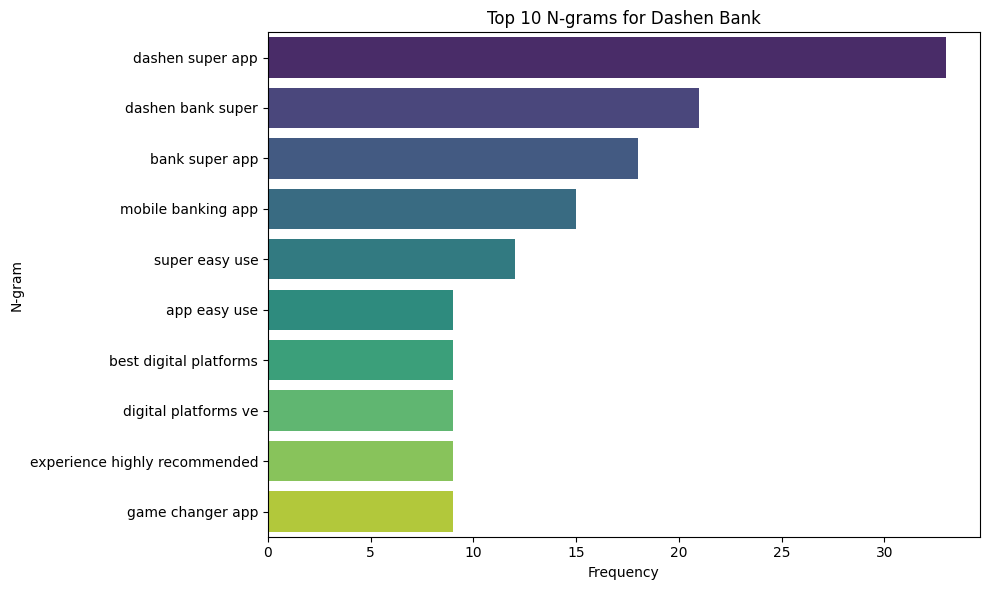

In [6]:
terms, counts = zip(*top_trigrams)
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=terms, palette='viridis', hue=terms)
plt.title('Top 10 N-grams for Dashen Bank')
plt.xlabel('Frequency')
plt.ylabel('N-gram')
plt.tight_layout()
plt.show()

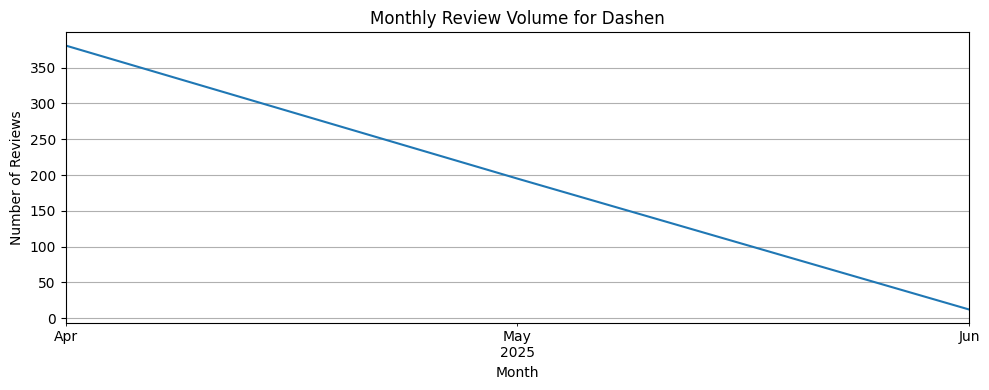

In [7]:
# Reviews per month
df_monthly = df.resample('ME', on='date').size()

plt.figure(figsize=(10,4))
df_monthly.plot()
plt.title('Monthly Review Volume for Dashen')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()


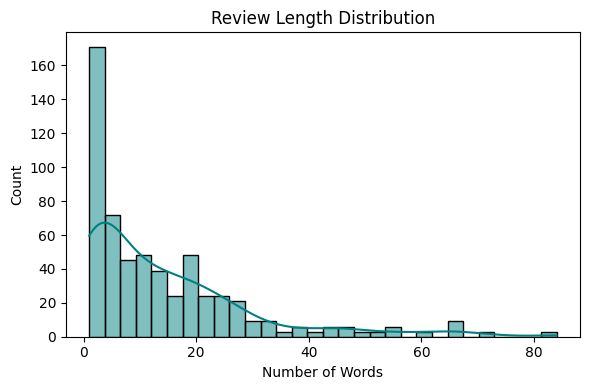

In [8]:
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))

# Review length distribution
plt.figure(figsize=(6,4))
sns.histplot(df['review_length'], bins=30, kde=True, color='teal')
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.tight_layout()
plt.show()


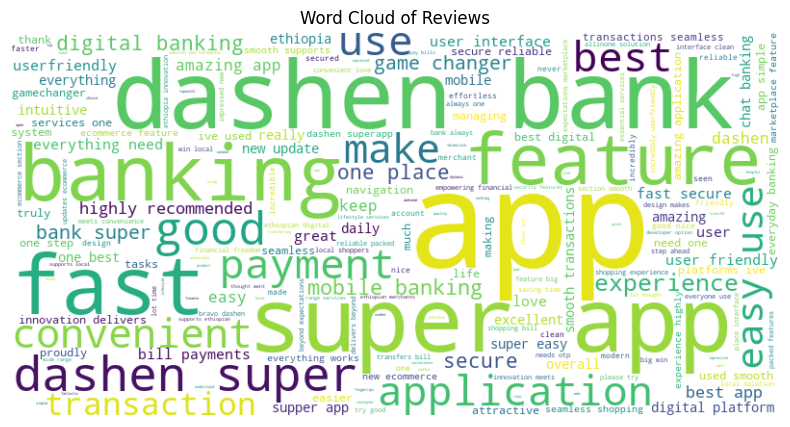

In [9]:
def preprocess_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', str(text).lower())  # remove non-letters
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

all_text = ' '.join(df['review'].dropna().map(preprocess_text))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()
